# Credit Card Default Prediction

## Imports and Initial Setup

In [12]:
import pandas as pd
import numpy

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
%config InlineBackend.figure_format = "svg"

In [14]:
data = pd.read_csv('data/credit_card_default.csv', index_col=0, header=0)
data = data.rename({'default payment next month': 'default_payment'}, axis=1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Target Variable is the default_payment

All variables are numeric and there are no missing values.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        30000 non-null  int64
 1   SEX              30000 non-null  int64
 2   EDUCATION        30000 non-null  int64
 3   MARRIAGE         30000 non-null  int64
 4   AGE              30000 non-null  int64
 5   PAY_0            30000 non-null  int64
 6   PAY_2            30000 non-null  int64
 7   PAY_3            30000 non-null  int64
 8   PAY_4            30000 non-null  int64
 9   PAY_5            30000 non-null  int64
 10  PAY_6            30000 non-null  int64
 11  BILL_AMT1        30000 non-null  int64
 12  BILL_AMT2        30000 non-null  int64
 13  BILL_AMT3        30000 non-null  int64
 14  BILL_AMT4        30000 non-null  int64
 15  BILL_AMT5        30000 non-null  int64
 16  BILL_AMT6        30000 non-null  int64
 17  PAY_AMT1         30000 non-null  int64
 18  PAY_AMT2   

<Axes: xlabel='default_payment', ylabel='count'>

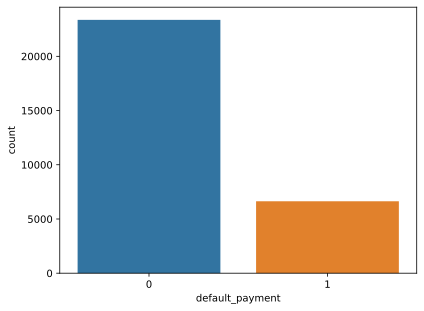

In [16]:
sns.countplot(data, x='default_payment')

Extract test set from the dataset, so that analysis isn't biased towards it

In [17]:
data_resample = data.sample(frac=1, random_state=42)
data = data_resample[:28000]
test_data = data_resample[28000:]

data.shape, test_data.shape

((28000, 24), (2000, 24))

Some initial data analysis tells ->
 - there are outliers

## Fitting an MLP without EDA and Feature Engineering

In [18]:
X, y = data.drop('default_payment', axis=1), data['default_payment']
X.shape, y.shape

((28000, 23), (28000,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def prep_test(data):
    X, y = data.drop('default_payment', axis=1), data['default_payment']
    X_scaled = scaler.transform(X)
    return X_scaled, y

X_scaled.shape

(28000, 23)

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=[32, 12], 
    activation='relu', solver='adam', 
    learning_rate='adaptive', learning_rate_init=1e-3, 
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    batch_size=1000,
    verbose=True
    ).fit(X_scaled, y)

Iteration 1, loss = 0.73185984
Validation score: 0.666071
Iteration 2, loss = 0.57972556
Validation score: 0.791071
Iteration 3, loss = 0.51828490
Validation score: 0.803929
Iteration 4, loss = 0.49914101
Validation score: 0.809286
Iteration 5, loss = 0.48428651
Validation score: 0.813214
Iteration 6, loss = 0.47361067
Validation score: 0.812500
Iteration 7, loss = 0.46613836
Validation score: 0.812857
Iteration 8, loss = 0.46041093
Validation score: 0.814286
Iteration 9, loss = 0.45650934
Validation score: 0.817143
Iteration 10, loss = 0.45349747
Validation score: 0.816786
Iteration 11, loss = 0.45128622
Validation score: 0.817500
Iteration 12, loss = 0.44904610
Validation score: 0.817143
Iteration 13, loss = 0.44728182
Validation score: 0.817857
Iteration 14, loss = 0.44559907
Validation score: 0.817857
Iteration 15, loss = 0.44430001
Validation score: 0.816786
Iteration 16, loss = 0.44295913
Validation score: 0.815714
Iteration 17, loss = 0.44211771
Validation score: 0.816429
Iterat

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

X_test, y_test = prep_test(test_data)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1562
           1       0.64      0.37      0.47       438

    accuracy                           0.82      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.80      0.82      0.80      2000



In [24]:
confusion_matrix(y_test, y_pred)

array([[1470,   92],
       [ 274,  164]])

<Axes: >

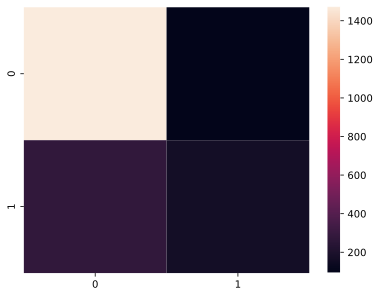

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred))

#### Dataset used

Yeh,I-Cheng. (2016). Default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.
